In [3]:
from ortools.linear_solver import pywraplp

# Definir os parâmetros do problema
qtd_doces = 16502
qtd_max_caixas_tipo = 150
qtd_max_caixas = 2
tipo_caixas = [91, 84, 70, 64, 45, 35, 25]

# Criar o solver
solver = pywraplp.Solver.CreateSolver('SCIP')

# Definir as variáveis de decisão (quantidade de cada tipo de caixa)
x = [solver.IntVar(0, qtd_max_caixas_tipo, f'x_{i}') for i in range(len(tipo_caixas))]
y = [solver.BoolVar(f'y_{i}') for i in range(len(tipo_caixas))]
z = solver.IntVar(0, qtd_doces, 'z')  # Excesso de doces

# Função objetivo: minimizar o número de caixas mais a quantidade de doces excedentes
solver.Minimize(solver.Sum(0.1 * x[i] for i in range(len(tipo_caixas))) + z)

# Restrição: o total de doces embalados deve ser maior ou igual à quantidade necessária
solver.Add(solver.Sum(tipo_caixas[i] * x[i] for i in range(len(tipo_caixas))) >= qtd_doces)

# Garantir que o excesso de doces seja calculado corretamente
solver.Add(solver.Sum(tipo_caixas[i] * x[i] for i in range(len(tipo_caixas))) - qtd_doces == z)

# Garantir que x[i] só tenha valor positivo se y[i] for 1
for i in range(len(tipo_caixas)):
    solver.Add(x[i] <= qtd_max_caixas_tipo * y[i])

# Restrição: no máximo `qtd_max_caixas` tipos de caixas podem ser usados
solver.Add(solver.Sum(y[i] for i in range(len(tipo_caixas))) <= qtd_max_caixas)

# Resolver o problema
status = solver.Solve()

# Verificar se a solução foi encontrada
if status == pywraplp.Solver.OPTIMAL:
    print('Solução ótima encontrada!')
    for i in range(len(tipo_caixas)):
        print(f'Quantidade de caixas do tipo {tipo_caixas[i]}: {x[i].solution_value()}')
    print(f'Quantidade de espaços vazios: {z.solution_value()}')
    #print(f'Valor da função objetivo (número total de caixas): {solver.Objective().Value()}')
else:
    print('Não foi encontrada uma solução ótima.')


Solução ótima encontrada!
Quantidade de caixas do tipo 91: 130.0
Quantidade de caixas do tipo 84: 0.0
Quantidade de caixas do tipo 70: 0.0
Quantidade de caixas do tipo 64: 73.0
Quantidade de caixas do tipo 45: 0.0
Quantidade de caixas do tipo 35: 0.0
Quantidade de caixas do tipo 25: 0.0
Quantidade de espaços vazios: 0.0


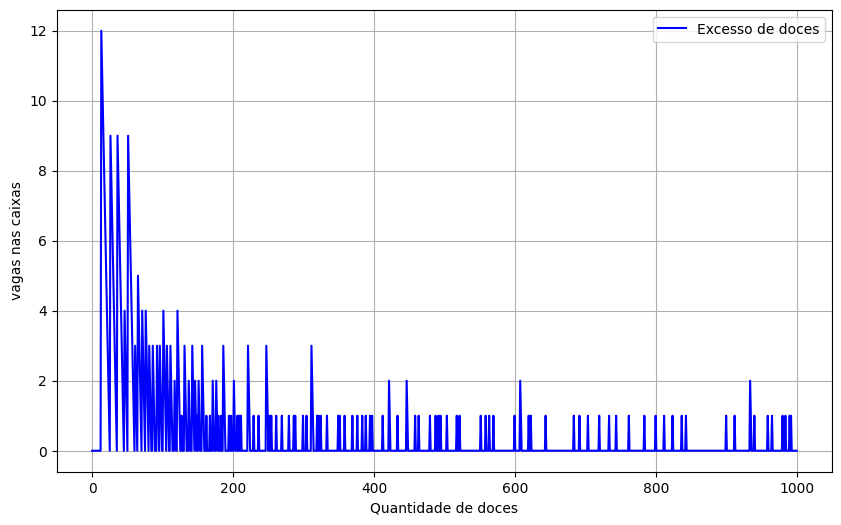

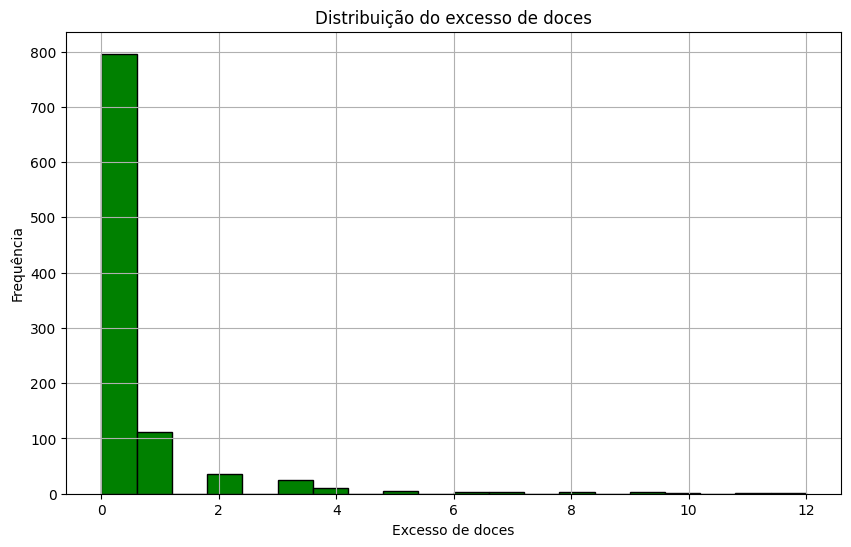

In [28]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt

# Definir os parâmetros do problema
qtd_doces = 1002
def encontra_caixas(qtd_doces):
    qtd_max_caixas_tipo = 15
    qtd_max_caixas = 2
    tipo_caixas = [91, 84, 70, 64, 45, 35, 25]

    # Criar o solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Definir as variáveis de decisão (quantidade de cada tipo de caixa)
    x = [solver.IntVar(0, qtd_max_caixas_tipo, f'x_{i}') for i in range(len(tipo_caixas))]
    y = [solver.BoolVar(f'y_{i}') for i in range(len(tipo_caixas))]
    z = solver.IntVar(0, qtd_doces, 'z')  # Excesso de doces

    # Função objetivo: minimizar o número de caixas mais a quantidade de doces excedentes
    solver.Minimize(solver.Sum(0.1 * x[i] for i in range(len(tipo_caixas))) + z)

    # Restrição: o total de doces embalados deve ser maior ou igual à quantidade necessária
    solver.Add(solver.Sum(tipo_caixas[i] * x[i] for i in range(len(tipo_caixas))) >= qtd_doces)

    # Garantir que o excesso de doces seja calculado corretamente
    solver.Add(solver.Sum(tipo_caixas[i] * x[i] for i in range(len(tipo_caixas))) - qtd_doces == z)

    # Garantir que x[i] só tenha valor positivo se y[i] for 1
    for i in range(len(tipo_caixas)):
        solver.Add(x[i] <= qtd_max_caixas_tipo * y[i])

    # Restrição: no máximo `qtd_max_caixas` tipos de caixas podem ser usados
    solver.Add(solver.Sum(y[i] for i in range(len(tipo_caixas))) <= qtd_max_caixas)

    # Resolver o problema
    status = solver.Solve()

    # Verificar se a solução foi encontrada
    # if status == pywraplp.Solver.OPTIMAL:
    #     print('Solução ótima encontrada!')
    #     for i in range(len(tipo_caixas)):
    #         print(f'Quantidade de caixas do tipo {tipo_caixas[i]}: {x[i].solution_value()}')
    #     print(f'Quantidade de espaços vazios: {z.solution_value()}')
    #     #print(f'Valor da função objetivo (número total de caixas): {solver.Objective().Value()}')
    # else:
    #     print('Não foi encontrada uma solução ótima.')
    return z.solution_value()

R=[]
for ii in range(1000):
    R.append(encontra_caixas(ii))

plt.figure(figsize=(10, 6))
plt.plot(range(1000), R, color='blue', label='Excesso de doces')
plt.xlabel('Quantidade de doces')
plt.ylabel('vagas nas caixas')
plt.title('')
plt.legend()
plt.grid(True)
plt.show()


# Criar o histograma do excesso de doces
plt.figure(figsize=(10, 6))
plt.hist(R, bins=20, color='green', edgecolor='black')
plt.xlabel('Excesso de doces')
plt.ylabel('Frequência')
plt.title('Distribuição do excesso de doces')
plt.grid(True)
plt.show()